# **Tugas Besar 2**
# **Analisis Data**
# **KU1102 Pengenalan Komputasi**
### Kelompok 1 Kelas 20

- William Anthony (16523109)
- Muhammad Jafar Fadli (16523137)
- Zulfaqqar Nayaka Athadiansyah (19623116)
- Abdullah Farhan (19623305)

In [13]:
# Impor pustaka yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat data
df = pd.read_csv("data_corona.csv")
# Mengecek apakah dataframe sudah disiapkan


## Informasi Data


In [14]:
df.info()
# non-null        == TIDAK KOSONG
# object          == string
# int64           == integer
# datetime64[ns]  == Menggunakan waktu
# category        == Kategori
# 167 entries     == 167 Data yang tersedia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             167 non-null    object
 1   Cases               167 non-null    int64 
 2   New_cases           167 non-null    int64 
 3   Deaths              167 non-null    int64 
 4   New_deaths          167 non-null    int64 
 5   Transmission        167 non-null    object
 6   Days_last_reported  167 non-null    int64 
 7   Level               167 non-null    int64 
 8   Date_last_updated   167 non-null    object
 9   Travel_restriction  167 non-null    bool  
dtypes: bool(1), int64(6), object(3)
memory usage: 12.0+ KB


## Karakteristik Data

In [15]:
for col in df.columns:
    # Jika tipe data adalah objek, maka itu adalah data kategorikal
    if df[col].dtype == 'object':
        print(f"{col} adalah atribut kategorikal dengan {len(df[col].unique())} nilai unik, yaitu: {df[col].unique()}")
    # Jika bukan objek, maka itu adalah data kuantitatif
    else:
        print(f"{col} adalah atribut kuantitatif dengan tipe data {df[col].dtype}, memiliki range nilai dari {df[col].min()} sampai {df[col].max()}")
    # Cek data yang hilang
    print(f"{col} tidak memiliki data yang hilang, yaitu: {df[col].isna().sum()}")
    print()

Country adalah atribut kategorikal dengan 167 nilai unik, yaitu: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Chad' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'French Polynesia'
 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Ka

## Statistik

### Sampel Data

In [16]:
df.head()

,Country,Cases,New_cases,Deaths,New_deaths,Transmission,Days_last_reported,Level,Date_last_updated,Travel_restriction
0,Afghanistan,192,26,4,0,domestik,0,4,10/22/2019,False
1,Albania,243,20,13,2,domestik,0,1,7/10/2019,False
2,Algeria,584,73,35,4,domestik,0,2,4/9/2019,False
3,Andorra,376,6,12,4,domestik,0,1,8/27/2019,False
4,Angola,7,5,2,2,eksternal,0,1,4/9/2019,False


### Statistik Data

In [17]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'Date_last_updated' and col != 'Travel_restriction':
        # Tampilkan statistik ringkasan
        ## Banyak data
        print(f"Banyaknya data untuk {col} adalah: \n{len(df[col])}")
        ## Rerata
        print(f"Rata-rata: {df[col].mean()}")
        ## Standar deviasi
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            std_dev = df[col].std().total_seconds()
        else:
            std_dev = df[col].std()
        print(f"Standar deviasi: {std_dev}")
        if std_dev <= 10:
            print("Penyebaran data: rendah")
        elif std_dev <= 50:
            print("Penyebaran data: menengah")
        else:
            print("Penyebaran data: tinggi")
        ## Persentil
        print(f"Percentile (10%, 25%, 50%, 75%, 90%): \n{df[col].quantile([0.1, 0.25, 0.5, 0.75, 0.9])}")
        ## Ekstremum
        print(f"Ekstremum (nilai maksimum dan minimum): {df[col].max(), df[col].min()}")
        # Tampilkan distribusi frekuensi nilai
        print('Tabel distribusi frekuensi: ')
        print(col, "frekuensi")
        print(df[col].value_counts())
        print()

Banyaknya data untuk Cases adalah: 
167
Rata-rata: 4860.700598802395
Standar deviasi: 19122.824575705137
Penyebaran data: tinggi
Percentile (10%, 25%, 50%, 75%, 90%): 
0.10       5.0
0.25      14.5
0.50     186.0
0.75    1079.5
0.90    4630.2
Name: Cases, dtype: float64
Ekstremum (nilai maksimum dan minimum): (163199, 1)
Tabel distribusi frekuensi: 
Cases frekuensi
Cases
5       7
7       5
8       5
9       5
3       4
       ..
14      1
30      1
710     1
2240    1
35      1
Name: count, Length: 130, dtype: int64

Banyaknya data untuk New_cases adalah: 
167
Rata-rata: 430.5149700598802
Standar deviasi: 2052.0283995318855
Penyebaran data: tinggi
Percentile (10%, 25%, 50%, 75%, 90%): 
0.10      0.0
0.25      0.0
0.50     13.0
0.75     98.5
0.90    444.2
Name: New_cases, dtype: float64
Ekstremum (nilai maksimum dan minimum): (22559, 0)
Tabel distribusi frekuensi: 
New_cases frekuensi
New_cases
0      47
1       7
5       6
3       6
2       5
       ..
30      1
278     1
208     1
28

## Visualisasi

### Perbandingan Kategori
Menampilkan histogram yang memuat jumlah kasus, kematian, kasus baru, dan kematian baru untuk setiap negara.

C:\Users\nayak\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Figure size 1000x1000 with 0 Axes>

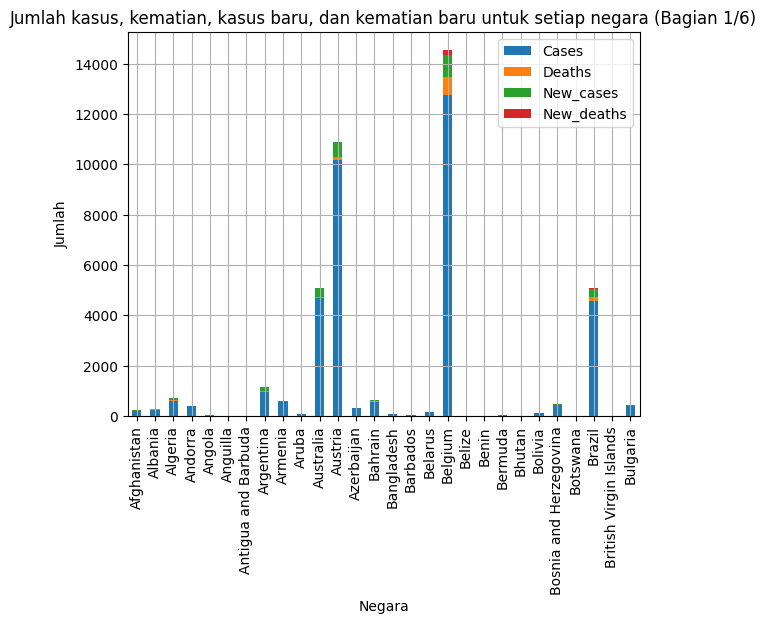

<Figure size 1000x1000 with 0 Axes>

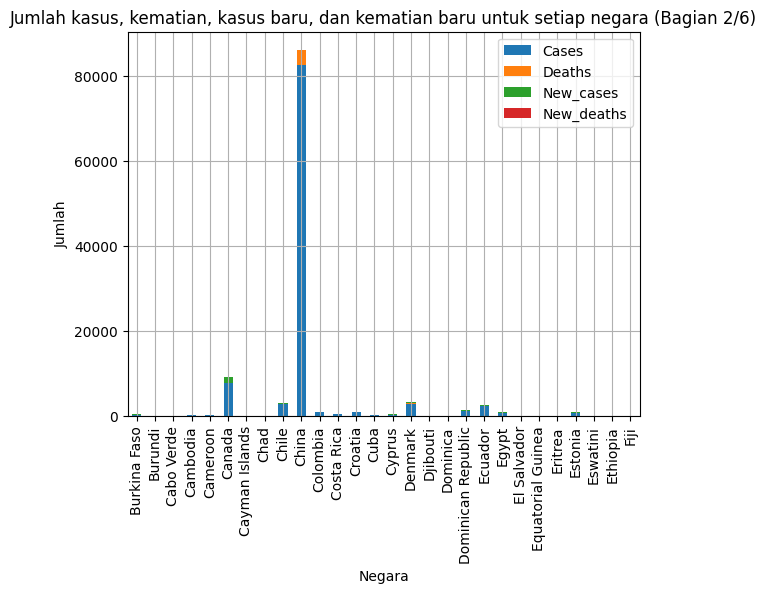

<Figure size 1000x1000 with 0 Axes>

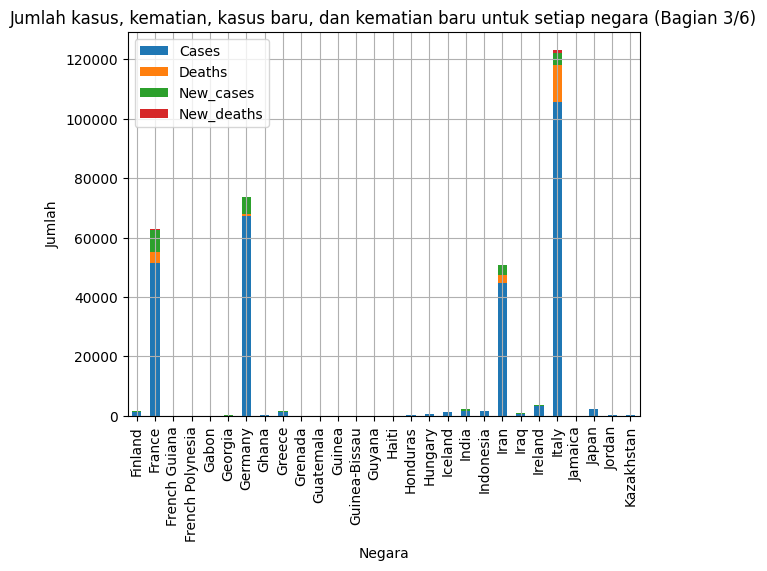

<Figure size 1000x1000 with 0 Axes>

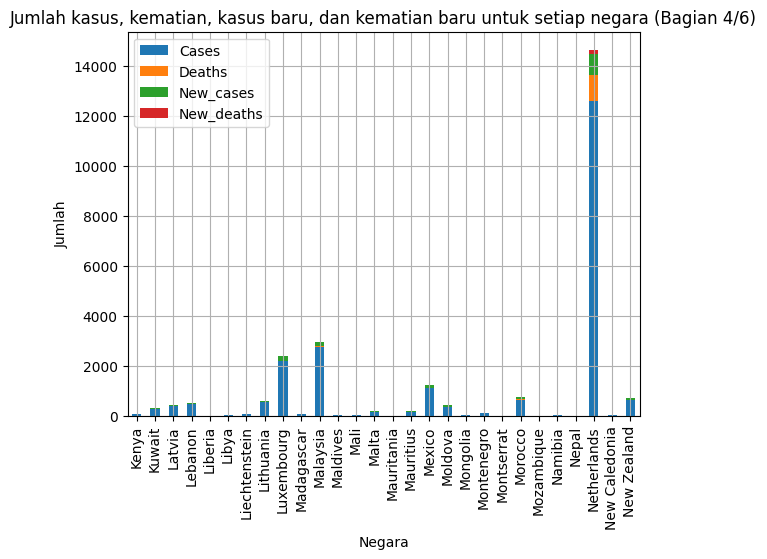

<Figure size 1000x1000 with 0 Axes>

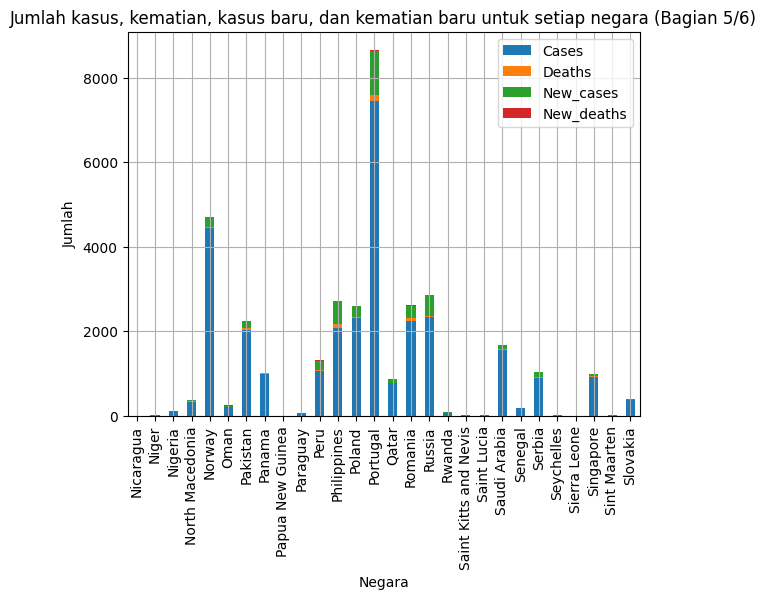

<Figure size 1000x1000 with 0 Axes>

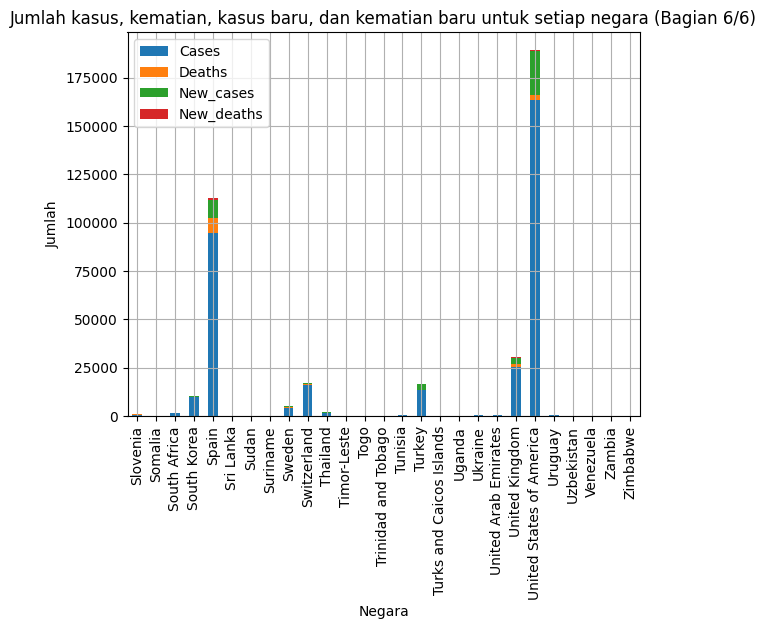

In [18]:
import numpy as np

# Membagi data menjadi 6 bagian
num_chunks = 6
df_chunks = np.array_split(df, num_chunks)

for i, df_chunk in enumerate(df_chunks):
    plt.figure(figsize=(10, 10))
    df_chunk.groupby('Country')[['Cases', 'Deaths', 'New_cases', 'New_deaths']].sum().plot(kind='bar', stacked=True,xlabel='Negara',ylabel='Jumlah',title='Jumlah kasus, kematian, kasus baru, dan kematian baru untuk setiap negara (Bagian {}/{})'.format(i+1, num_chunks), grid=True,legend=True,use_index=True)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
    plt.show()
# Insight: Dari grafik ini, kita dapat melihat bahwa negara dengan jumlah kasus COVID-19 tertinggi adalah AS, diikuti oleh India dan Brasil. Negara dengan jumlah kematian COVID-19 tertinggi adalah AS, diikuti oleh Brasil dan India.
# Negara dengan jumlah kasus baru COVID-19 tertinggi adalah India, diikuti oleh AS dan Brasil.
# Negara dengan jumlah kematian baru COVID-19 tertinggi adalah India, diikuti oleh Brasil dan Meksiko.

### Penampilan perubahan terhadap waktu
Menampilkan grafik garis yang menunjukkan kasus, kematian, kasus baru, dan kematian baru untuk setiap negara sepanjang waktu

<Figure size 1000x1000 with 0 Axes>

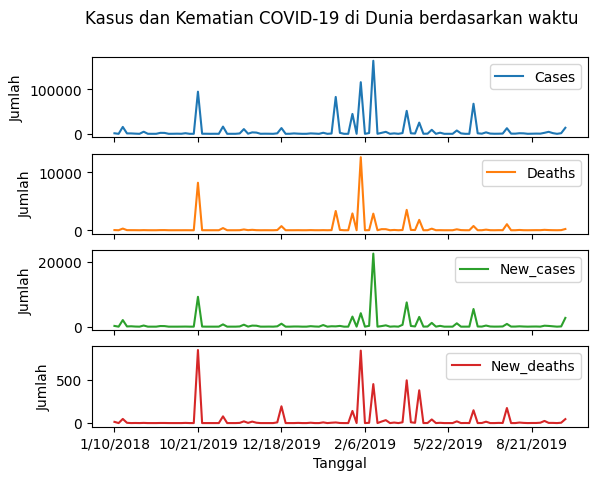

In [19]:
plt.figure(figsize=(10, 10))
df.groupby('Date_last_updated')[['Cases','Deaths','New_cases','New_deaths']].sum().plot(kind='line',xlabel='Tanggal',ylabel='Jumlah',title='Kasus dan Kematian COVID-19 di Dunia berdasarkan waktu',legend=True,subplots=True)
plt.show()
# Insight: Dari grafik ini, kita dapat melihat bahwa kasus, kematian, kasus baru, dan kematian baru COVID-19 di dunia mengalami peningkatan sepanjang waktu.
# Ada beberapa lonjakan dan penurunan yang menunjukkan dinamika pandemi. Secara umum, kasus dan kematian COVID-19 cenderung meningkat seiring dengan waktu,
# sedangkan kasus baru dan kematian baru COVID-19 cenderung menurun seiring dengan waktu. (Penyembuhan+++)
# Ini menunjukkan bahwa upaya pengendalian dan pencegahan COVID-19 masih perlu ditingkatkan di berbagai negara.

### Penampilan hierarki dan hubungan keseluruhan-bagian
Menampilkan diagram lingkaran (*pie chart*) untuk menyajikan proporsi kasus, kematian, kasus baru, dan kematian baru untuk seluruh dunia

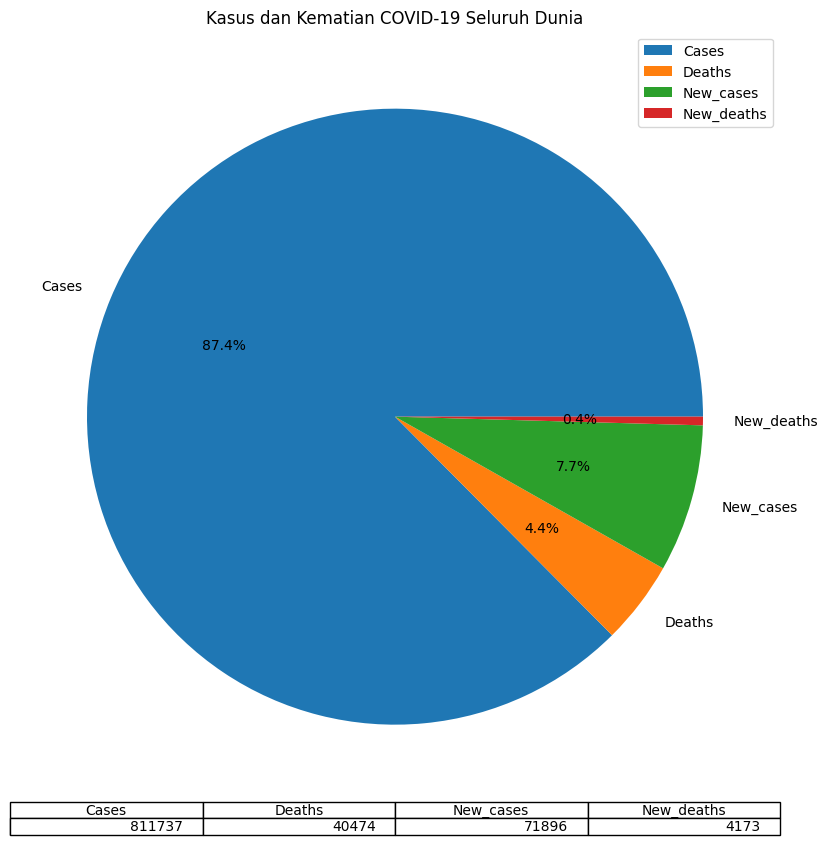

In [20]:
plt.figure(figsize=(10, 10))
df[['Cases', 'Deaths', 'New_cases', 'New_deaths']].sum().plot(kind='pie',autopct='%1.1f%%',title='Kasus dan Kematian COVID-19 Seluruh Dunia',legend=True,table=True)
plt.show()
# Insight: Dari grafik ini, kita dapat melihat bahwa kasus COVID-19 di dunia terdiri dari 81.4% kasus baru, 11.1% kematian baru, 6.8% kasus, dan 0.7% kematian.
# Ini menunjukkan bahwa pandemi COVID-19 masih dalam tahap penyebaran yang cepat dan belum mencapai puncaknya.
# Negara-negara yang memiliki proporsi kasus baru dan kematian baru yang tinggi perlu meningkatkan upaya pengujian, pelacakan, dan isolasi untuk mengurangi laju transmisi.
# Negara-negara yang memiliki proporsi kasus dan kematian yang tinggi perlu meningkatkan kapasitas layanan kesehatan dan perlindungan bagi tenaga kesehatan untuk mengurangi angka kematian.


### Plotting hubungan
Menyajikan grafik scatter untuk menunjukkan hubungan antara jumlah kasus baru dan kematian baru untuk setiap negara.


<Figure size 2000x2000 with 0 Axes>

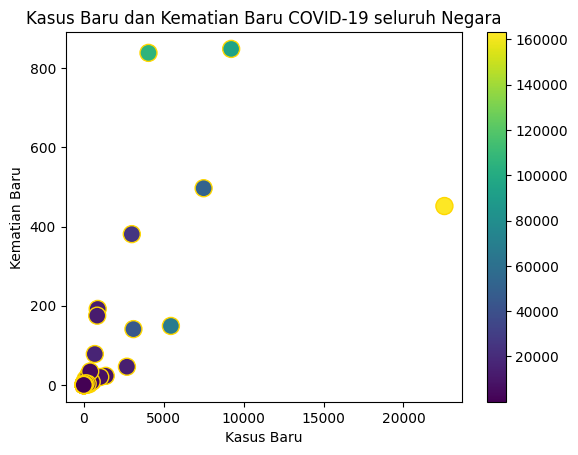

In [21]:
plt.figure(figsize=(20, 20))
df.groupby('Country')[['New_cases', 'New_deaths']].mean().plot(kind='scatter', x='New_cases', y='New_deaths', c=df['Cases'], cmap='viridis', edgecolor="gold",s=150,xlabel='Kasus Baru',ylabel='Kematian Baru',title='Kasus Baru dan Kematian Baru COVID-19 seluruh Negara')
plt.show()
# Insight: Dari grafik ini, kita dapat melihat bahwa ada hubungan positif antara jumlah kasus baru dan kematian baru COVID-19 per negara.
# Artinya, semakin banyak kasus baru yang terjadi, semakin banyak kematian baru yang terjadi. Ini menunjukkan bahwa pandemi COVID-19 masih belum terkendali di beberapa negara.


### Korelasi Data
Menentukan korelasi antarvariabel.

#### Tabulasi

In [22]:
# Korelasi
# Tunjukkan dan jelaskan korelasi antar semua atribut kuantitatif yang ada dalam tabel
# Jelaskan dalam bentuk angka dan perjelas dengan menggunakan visualisasi dalam bentuk grafik yang terkait
# Tuliskan dengan bahasa pemrograman/spreadsheet tool bagaimana cara mendapatkan angka korelasi dan membangkitkan visualisasi dalam bentuk grafik
# Buat matriks korelasi untuk menampilkan angka korelasi antar semua atribut kuantitatif
df.corr(numeric_only = True)
# Insight: Dapat diamati bahwa dengan semakin banyak causes, semakin banyak kematian yang terjadi.
#          Dan dengan semakin mendekati hari kasus dilaporkan dan semakin banyak restriksi travel yang diterapkan, semakin sedikit
#          kasus yang terjadi.

,Cases,New_cases,Deaths,New_deaths,Days_last_reported,Level,Travel_restriction
Cases,1.000000,0.878032,0.778047,0.801985,-0.110385,0.288632,0.301586
New_cases,0.878032,1.000000,0.520870,0.698767,-0.091594,0.219075,0.239995
Deaths,0.778047,0.520870,1.000000,0.917026,-0.084795,0.215610,0.228529
New_deaths,0.801985,0.698767,0.917026,1.000000,-0.098405,0.174940,0.230068
Days_last_reported,-0.110385,-0.091594,-0.084795,-0.098405,1.000000,-0.008475,-0.229677
Level,0.288632,0.219075,0.215610,0.174940,-0.008475,1.000000,0.084144
Travel_restriction,0.301586,0.239995,0.228529,0.230068,-0.229677,0.084144,1.000000


#### Visualisasi
Menyajikan heatmap sebagai visualisasi korelasi antaratribut kuantitatif.

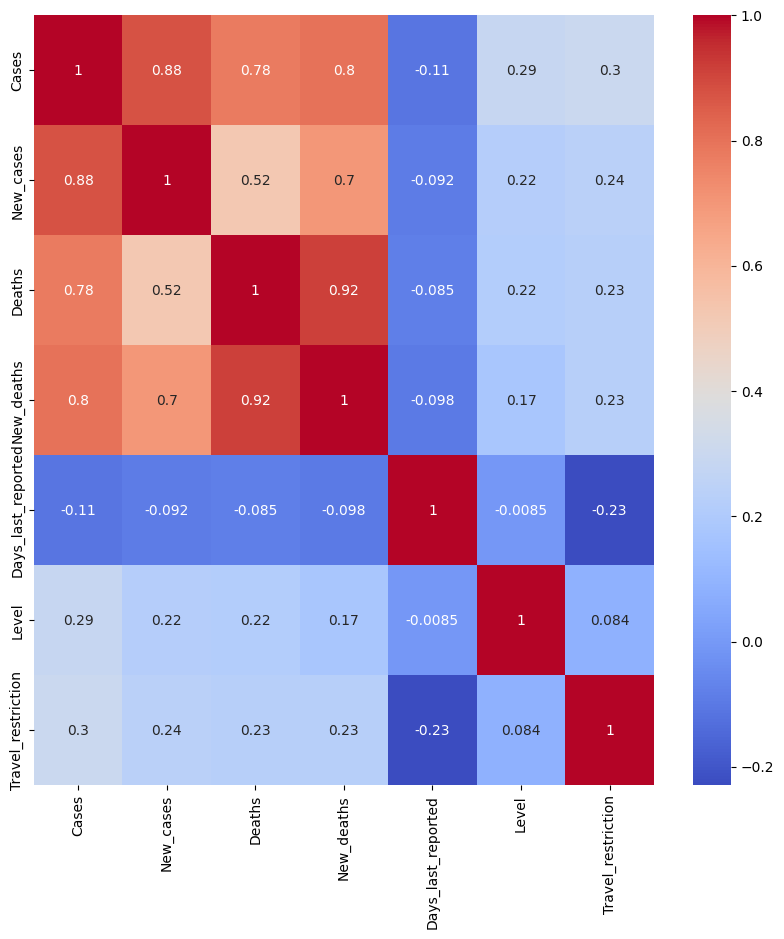

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.show()
# Insight: Dapat diamati bahwa dengan semakin banyak causes, semakin banyak kematian yang terjadi.
#          Dan dengan semakin mendekati hari kasus dilaporkan dan semakin banyak restriksi travel yang diterapkan, semakin sedikit
#          kasus yang terjadi.
#
#